한 행에 시계열에 대한 데이터가 다 들어가야한다. <br/>
컬럼3, 6, 9, ~ 240
한 행의 답이 20개의 답이 되어줄 것이다.


In [1]:
%pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb  # LightGBM
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
warnings.filterwarnings("ignore")


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("./data/rainfall_train.csv", encoding='utf-8', index_col=False)
df

,Unnamed: 0,rainfall_train.fc_year,rainfall_train.fc_month,rainfall_train.fc_day,rainfall_train.fc_hour,rainfall_train.stn4contest,rainfall_train.dh,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,...,rainfall_train.v02,rainfall_train.v03,rainfall_train.v04,rainfall_train.v05,rainfall_train.v06,rainfall_train.v07,rainfall_train.v08,rainfall_train.v09,rainfall_train.vv,rainfall_train.class_interval
0,1,A,5,1,9,STN001,3,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
1,2,A,5,1,9,STN001,6,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
2,3,A,5,1,9,STN001,9,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
3,4,A,5,1,9,STN001,12,A,5,1,...,0,0,0,0,0,0,0,0,0.0,0
4,5,A,5,1,9,STN001,15,A,5,2,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,1457248,C,9,30,21,STN020,228,C,10,10,...,7,2,2,0,0,0,0,0,0.5,3
1457248,1457249,C,9,30,21,STN020,231,C,10,10,...,9,5,3,1,0,0,0,0,0.0,0
1457249,1457250,C,9,30,21,STN020,234,C,10,10,...,9,5,3,1,0,0,0,0,1.9,4
1457250,1457251,C,9,30,21,STN020,237,C,10,10,...,6,4,2,2,0,0,0,0,1.9,4


In [4]:
df["rainfall_train.dh"].value_counts()

rainfall_train.dh
3      18239
39     18239
69     18239
66     18239
6      18239
       ...  
234    18165
237    18163
240    18159
207    18148
210    18142
Name: count, Length: 80, dtype: int64

In [5]:
df['prob_0'] = 100 - df['rainfall_train.v01']
df['prob_1'] = df['rainfall_train.v01'] - df['rainfall_train.v02']
df['prob_2'] = df['rainfall_train.v02'] - df['rainfall_train.v03']
df['prob_3'] = df['rainfall_train.v03'] - df['rainfall_train.v04']
df['prob_4'] = df['rainfall_train.v04'] - df['rainfall_train.v05']
df['prob_5'] = df['rainfall_train.v05'] - df['rainfall_train.v06']
df['prob_6'] = df['rainfall_train.v06'] - df['rainfall_train.v07']
df['prob_7'] = df['rainfall_train.v07'] - df['rainfall_train.v08']
df['prob_8'] = df['rainfall_train.v08'] - df['rainfall_train.v09']
df['prob_9'] = df['rainfall_train.v09']
df.drop(columns=['rainfall_train.v01',
                 'rainfall_train.v02',
                 'rainfall_train.v03',
                 'rainfall_train.v04',
                 'rainfall_train.v05',
                 'rainfall_train.v06',
                 'rainfall_train.v07',
                 'rainfall_train.v08',
                 'rainfall_train.v09'], inplace=True)
df = df[df['rainfall_train.vv'] >= 0]

df

,Unnamed: 0,rainfall_train.fc_year,rainfall_train.fc_month,rainfall_train.fc_day,rainfall_train.fc_hour,rainfall_train.stn4contest,rainfall_train.dh,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,...,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9
0,1,A,5,1,9,STN001,3,A,5,1,...,100,0,0,0,0,0,0,0,0,0
1,2,A,5,1,9,STN001,6,A,5,1,...,100,0,0,0,0,0,0,0,0,0
2,3,A,5,1,9,STN001,9,A,5,1,...,100,0,0,0,0,0,0,0,0,0
3,4,A,5,1,9,STN001,12,A,5,1,...,100,0,0,0,0,0,0,0,0,0
4,5,A,5,1,9,STN001,15,A,5,2,...,100,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,1457248,C,9,30,21,STN020,228,C,10,10,...,91,2,5,0,2,0,0,0,0,0
1457248,1457249,C,9,30,21,STN020,231,C,10,10,...,87,4,4,2,2,1,0,0,0,0
1457249,1457250,C,9,30,21,STN020,234,C,10,10,...,87,4,4,2,2,1,0,0,0,0
1457250,1457251,C,9,30,21,STN020,237,C,10,10,...,92,2,2,2,0,2,0,0,0,0


In [6]:
df["expected"] = (df["prob_0"] * 0\
                +df["prob_1"] * 10\
                +df["prob_2"] * 20\
                +df["prob_3"] * 30\
                +df["prob_4"] * 40\
                +df["prob_5"] * 50\
                +df["prob_6"] * 60\
                +df["prob_7"] * 70\
                +df["prob_8"] * 80\
                +df["prob_9"] * 90) / 100
df.drop(columns=["prob_0","prob_1","prob_2","prob_3","prob_4","prob_5","prob_6","prob_7","prob_8","prob_9"], inplace=True)
df

,Unnamed: 0,rainfall_train.fc_year,rainfall_train.fc_month,rainfall_train.fc_day,rainfall_train.fc_hour,rainfall_train.stn4contest,rainfall_train.dh,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,rainfall_train.ef_hour,rainfall_train.vv,rainfall_train.class_interval,expected
0,1,A,5,1,9,STN001,3,A,5,1,12,0.0,0,0.0
1,2,A,5,1,9,STN001,6,A,5,1,15,0.0,0,0.0
2,3,A,5,1,9,STN001,9,A,5,1,18,0.0,0,0.0
3,4,A,5,1,9,STN001,12,A,5,1,21,0.0,0,0.0
4,5,A,5,1,9,STN001,15,A,5,2,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,1457248,C,9,30,21,STN020,228,C,10,10,9,0.5,3,2.0
1457248,1457249,C,9,30,21,STN020,231,C,10,10,12,0.0,0,3.1
1457249,1457250,C,9,30,21,STN020,234,C,10,10,15,1.9,4,3.1
1457250,1457251,C,9,30,21,STN020,237,C,10,10,18,1.9,4,2.2


In [7]:
df.drop(columns=['Unnamed: 0', 'rainfall_train.fc_year',	'rainfall_train.fc_month',	'rainfall_train.fc_day',	'rainfall_train.fc_hour'], inplace=True)
df

,rainfall_train.stn4contest,rainfall_train.dh,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,rainfall_train.ef_hour,rainfall_train.vv,rainfall_train.class_interval,expected
0,STN001,3,A,5,1,12,0.0,0,0.0
1,STN001,6,A,5,1,15,0.0,0,0.0
2,STN001,9,A,5,1,18,0.0,0,0.0
3,STN001,12,A,5,1,21,0.0,0,0.0
4,STN001,15,A,5,2,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
1457247,STN020,228,C,10,10,9,0.5,3,2.0
1457248,STN020,231,C,10,10,12,0.0,0,3.1
1457249,STN020,234,C,10,10,15,1.9,4,3.1
1457250,STN020,237,C,10,10,18,1.9,4,2.2


In [8]:
pivot_df = df.pivot_table(index=['rainfall_train.stn4contest', 
                                 'rainfall_train.ef_year', 
                                 'rainfall_train.ef_month', 
                                 'rainfall_train.ef_day', 
                                 'rainfall_train.ef_hour',
                                 'rainfall_train.vv',
                                 'rainfall_train.class_interval'
                                 ],
                          columns='rainfall_train.dh',
                          values='expected').reset_index()
pivot_df

rainfall_train.dh,rainfall_train.stn4contest,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,rainfall_train.ef_hour,rainfall_train.vv,rainfall_train.class_interval,3,6,9,...,213,216,219,222,225,228,231,234,237,240
0,STN001,A,5,1,12,0.0,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STN001,A,5,1,15,0.0,0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STN001,A,5,1,18,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STN001,A,5,1,21,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STN001,A,5,2,0,0.0,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77518,STN020,C,10,10,9,0.5,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.1
77519,STN020,C,10,10,12,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.1,NaN,NaN,NaN
77520,STN020,C,10,10,15,1.9,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,NaN,NaN
77521,STN020,C,10,10,18,1.9,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2,NaN


In [9]:
final_df = pivot_df.groupby([
    'rainfall_train.stn4contest', 
    'rainfall_train.ef_year', 
    'rainfall_train.ef_month', 
    'rainfall_train.ef_day', 
    'rainfall_train.ef_hour']).sum().reset_index()
final_df


rainfall_train.dh,rainfall_train.stn4contest,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,rainfall_train.ef_hour,rainfall_train.vv,rainfall_train.class_interval,3,6,9,...,213,216,219,222,225,228,231,234,237,240
0,STN001,A,5,1,12,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,STN001,A,5,1,15,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,STN001,A,5,1,18,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,STN001,A,5,1,21,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,STN001,A,5,2,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77518,STN020,C,10,10,9,0.5,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.1
77519,STN020,C,10,10,12,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.1,0.0,0.0,0.0
77520,STN020,C,10,10,15,1.9,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.1,0.0,0.0
77521,STN020,C,10,10,18,1.9,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0


In [10]:
final_df.columns

Index([   'rainfall_train.stn4contest',        'rainfall_train.ef_year',
             'rainfall_train.ef_month',         'rainfall_train.ef_day',
              'rainfall_train.ef_hour',             'rainfall_train.vv',
       'rainfall_train.class_interval',                               3,
                                     6,                               9,
                                    12,                              15,
                                    18,                              21,
                                    24,                              27,
                                    30,                              33,
                                    36,                              39,
                                    42,                              45,
                                    48,                              51,
                                    54,                              57,
                                    60,            

In [11]:
df[(df["rainfall_train.stn4contest"] == 'STN001') &
   	(df["rainfall_train.ef_year"] == 'A') &	
    (df["rainfall_train.ef_month"] == 8) & 
    (df["rainfall_train.ef_day"] == 1) &
    (df["rainfall_train.ef_hour"] == 12)
       ]

,rainfall_train.stn4contest,rainfall_train.dh,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,rainfall_train.ef_hour,rainfall_train.vv,rainfall_train.class_interval,expected
13274,STN001,231,A,8,1,12,28.1,8,31.2
13350,STN001,219,A,8,1,12,28.1,8,30.8
13426,STN001,207,A,8,1,12,28.1,8,30.8
13502,STN001,195,A,8,1,12,28.1,8,38.5
13578,STN001,183,A,8,1,12,28.1,8,40.5
13654,STN001,171,A,8,1,12,28.1,8,43.6
13730,STN001,159,A,8,1,12,28.1,8,41.8
13806,STN001,147,A,8,1,12,28.1,8,37.6
13882,STN001,135,A,8,1,12,28.1,8,40.6
13958,STN001,123,A,8,1,12,28.1,8,40.2


In [12]:
final_df[(final_df["rainfall_train.stn4contest"] == 'STN001') &
   	(final_df["rainfall_train.ef_year"] == 'A') &	
    (final_df["rainfall_train.ef_month"] == 8) & 
    (final_df["rainfall_train.ef_day"] == 1) &
    (final_df["rainfall_train.ef_hour"] == 12)
       ]

rainfall_train.dh,rainfall_train.stn4contest,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,rainfall_train.ef_hour,rainfall_train.vv,rainfall_train.class_interval,3,6,9,...,213,216,219,222,225,228,231,234,237,240
731,STN001,A,8,1,12,28.1,8,61.7,0.0,0.0,...,0.0,0.0,30.8,0.0,0.0,0.0,31.2,0.0,0.0,0.0


In [13]:
final_df.to_csv("./pivot_expected.csv", encoding='utf-8', index=False)

In [15]:

X = final_df.drop(columns=[
    'rainfall_train.stn4contest',	
    'rainfall_train.ef_year',	
    'rainfall_train.ef_month',	
    'rainfall_train.ef_day',	
    'rainfall_train.ef_hour',
    'rainfall_train.vv',
    'rainfall_train.class_interval'
])
y = final_df[['rainfall_train.class_interval']]




X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:

# 개별 모델 학습
catboost = CatBoostClassifier(iterations=100, random_seed=42, silent=True)
lgbm = LGBMClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)

catboost.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# 검증 데이터로 개별 모델 예측 (확률 값 사용)
catboost_val_pred_proba = catboost.predict_proba(X_val)
lgbm_val_pred_proba = lgbm.predict_proba(X_val)
xgb_val_pred_proba = xgb.predict_proba(X_val)

# Stacked features for meta model (확률 값 사용)
stacked_features_proba = np.hstack((catboost_val_pred_proba, lgbm_val_pred_proba, xgb_val_pred_proba))
meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
meta_model.fit(stacked_features_proba, y_val)




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20410
[LightGBM] [Info] Number of data points in the train set: 62018, number of used features: 81
[LightGBM] [Info] Start training from score -0.168346
[LightGBM] [Info] Start training from score -4.196775
[LightGBM] [Info] Start training from score -3.753794
[LightGBM] [Info] Start training from score -3.836249
[LightGBM] [Info] Start training from score -3.770450
[LightGBM] [Info] Start training from score -3.551936
[LightGBM] [Info] Start training from score -3.955153
[LightGBM] [Info] Start training from score -4.260956
[LightGBM] [Info] Start training from score -5.215097
[LightGBM] [Info] Start training from score -5.407559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

LogisticRegression(max_iter=200, multi_class='multinomial')

채점 데이터도 제작해보자

In [28]:
test_df = pd.read_csv("./data/rainfall_test.csv", encoding='utf-8', index_col=False)
test_df['prob_0'] = 100 - test_df['rainfall_test.v01']
test_df['prob_1'] = test_df['rainfall_test.v01'] - test_df['rainfall_test.v02']
test_df['prob_2'] = test_df['rainfall_test.v02'] - test_df['rainfall_test.v03']
test_df['prob_3'] = test_df['rainfall_test.v03'] - test_df['rainfall_test.v04']
test_df['prob_4'] = test_df['rainfall_test.v04'] - test_df['rainfall_test.v05']
test_df['prob_5'] = test_df['rainfall_test.v05'] - test_df['rainfall_test.v06']
test_df['prob_6'] = test_df['rainfall_test.v06'] - test_df['rainfall_test.v07']
test_df['prob_7'] = test_df['rainfall_test.v07'] - test_df['rainfall_test.v08']
test_df['prob_8'] = test_df['rainfall_test.v08'] - test_df['rainfall_test.v09']
test_df['prob_9'] = test_df['rainfall_test.v09']
test_df.drop(columns=['rainfall_test.v01',
                 'rainfall_test.v02',
                 'rainfall_test.v03',
                 'rainfall_test.v04',
                 'rainfall_test.v05',
                 'rainfall_test.v06',
                 'rainfall_test.v07',
                 'rainfall_test.v08',
                 'rainfall_test.v09'], inplace=True)

test_df["expected"] = (test_df["prob_0"] * 0\
                 +test_df["prob_1"] * 10\
                 +test_df["prob_2"] * 20\
                 +test_df["prob_3"] * 30\
                 +test_df["prob_4"] * 40\
                 +test_df["prob_5"] * 50\
                 +test_df["prob_6"] * 60\
                 +test_df["prob_7"] * 70\
                 +test_df["prob_8"] * 80\
                 +test_df["prob_9"] * 90) / 100
test_df.drop(columns=["prob_0","prob_1","prob_2","prob_3","prob_4","prob_5","prob_6","prob_7","prob_8","prob_9"], inplace=True)

test_df.drop(columns=['rainfall_test.fc_year',	'rainfall_test.fc_month',	'rainfall_test.fc_day',	'rainfall_test.fc_hour'], inplace=True)

test_df = test_df.pivot_table(index=['rainfall_test.stn4contest', 
                                 'rainfall_test.ef_year', 
                                 'rainfall_test.ef_month', 
                                 'rainfall_test.ef_day', 
                                 'rainfall_test.ef_hour',
                                 ],
                          columns='rainfall_test.dh',
                          values='expected').reset_index()

test_df = test_df.groupby([
    'rainfall_test.stn4contest', 
    'rainfall_test.ef_year', 
    'rainfall_test.ef_month', 
    'rainfall_test.ef_day', 
    'rainfall_test.ef_hour']).sum().reset_index()

X_test = test_df.drop(columns=[
    'rainfall_test.stn4contest',	
    'rainfall_test.ef_year',	
    'rainfall_test.ef_month',	
    'rainfall_test.ef_day',	
    'rainfall_test.ef_hour',
])


In [29]:
# 테스트 데이터로 최종 성능 평가 (확률 값 사용)
catboost_test_pred_proba = catboost.predict_proba(X_test)
lgbm_test_pred_proba = lgbm.predict_proba(X_test)
xgb_test_pred_proba = xgb.predict_proba(X_test)

stacked_test_features_proba = np.hstack((catboost_test_pred_proba, lgbm_test_pred_proba, xgb_test_pred_proba))
final_pred = meta_model.predict(stacked_test_features_proba)

# 최종 예측 결과 확인
print(pd.Series(final_pred).value_counts())

CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:81: At position 0 should be feature with name rainfall_train.class_interval (found 3).

In [ ]:
print(pd.Series(final_pred).value_counts())


0    13128
5      427
2      373
4      370
3      325
6      290
7      220
1      215
8       81
9       76
Name: count, dtype: int64


In [ ]:
predict_data = {
    "pred": final_pred
}
pred_df = pd.DataFrame(predict_data)

CSI: 1.0
H: 2377, F: 0, M: 0, C: 13128


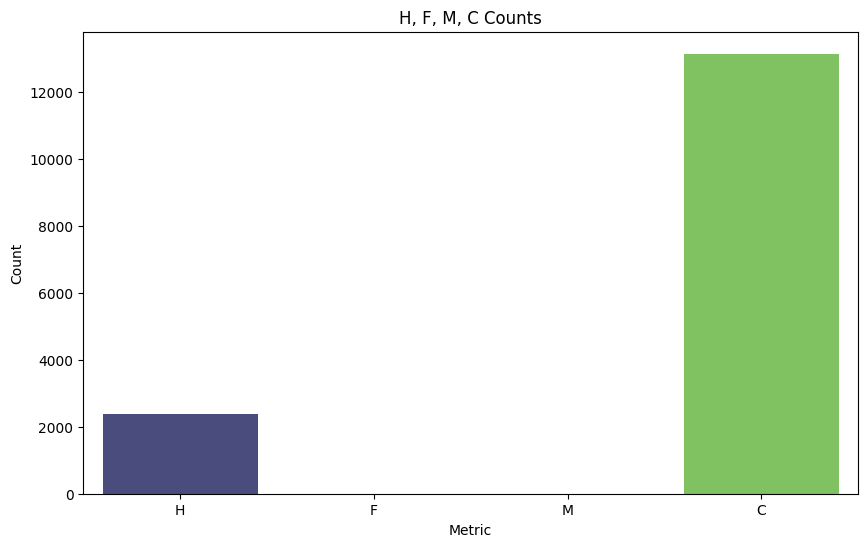

In [ ]:
# # 평가
# print(classification_report(y_test, final_pred))
# print(confusion_matrix(y_test, final_pred))

# 최종 예측 결과를 데이터프레임에 추가
results_df = pd.DataFrame({'estimated_rank': final_pred.ravel(), 'rainfall_train.class_interval': np.array(y_test).ravel()})

# H, F, M, C 계산 함수
def calculate_csi_components(df):
    H = ((df['estimated_rank'] != 0) & (df['rainfall_train.class_interval'] != 0) & (df['estimated_rank'] == df['rainfall_train.class_interval'])).sum()
    F = ((df['estimated_rank'] != 0) & (df['estimated_rank'] != df['rainfall_train.class_interval'])).sum()
    M = ((df['estimated_rank'] == 0) & (df['rainfall_train.class_interval'] != 0)).sum()
    C = ((df['estimated_rank'] == 0) & (df['rainfall_train.class_interval'] == 0)).sum()
    return H, F, M, C

# CSI 계산 함수
def calculate_csi(H, F, M):
    return H / (H + F + M) if (H + F + M) > 0 else 0

# H, F, M, C 계산
H, F, M, C = calculate_csi_components(results_df)

# CSI 계산
csi_value = calculate_csi(H, F, M)
print(f"CSI: {csi_value}")
print(f"H: {H}, F: {F}, M: {M}, C: {C}")

# H, F, M, C 값 시각화
metrics = pd.DataFrame({'Metric': ['H', 'F', 'M', 'C'], 'Count': [H, F, M, C]})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Count', data=metrics, palette='viridis')
plt.title('H, F, M, C Counts')
plt.xlabel('Metric')
plt.ylabel('Count')
plt.show()